# Analisis de visitas - modelos de gestión

In [50]:
#Nomenclatura y definiciones 
# MM - Mando Medio =supervisores de rutas
# ReglaNegocio = Cantidad de visitas a clientes o acompañamiento a ruta que se deben realizar como base al mes



import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

class ModeloVisita:
    """Clase que representa a un modelo de visita"""
    
    key = "routeSchedule"  # Clientes/Rutas = [routeSchedule] | MandoMedio = [employee] 
    mes = "Agosto"
    reglaNegocio = 8
    tipoVisita   = 4   #   4.-Acompañamiento ruta | 35.-Visita  a cliente
    tipoAnalisis = 1   #   1.- valorAnalizado < reglaNegocio | 2.- valorAnalizado >= reglaNegocio 
                       #   3.- valorAnalizado(MM) < reglaNegocio | 4.- valorAnalizado(MM) >= reglaNegocio
    
    
    #Constructor
    #def __init__ (self, key, mes, reglaNegocio , tipoVisita, tipoAnalisis):
    #def __init__ (self):
        #self.key = key
        #self.mes = mes 
        #self.reglaNegocio = reglaNegocio
        #self.tipoVisita = tipoVisita
        #self.tipoAnalisis = tipoAnalisis
        
    
    #checar si podemos dejar la ruta en c:
    def cargarArchivo(self):
        return pd.read_csv("C:\\Users\\juayala\\Documents\\CursoPython\\schedules" + str(self.tipoVisita) + self.mes + ".csv")
    
    
    def analizar(self, data):
        #Menos visitas
        if int(self.tipoAnalisis) == (1 or 3):
            dataGraficaBarras = data[data["idSchedul"] < int(self.reglaNegocio) ]
    
            #Mayor o igual a las visitas
        elif int(self.tipoAnalisis) == (2 or 4):
            dataGraficaBarras = data[data["idSchedul"] >= int(self.reglaNegocio) ]
        
        
    #***************Imprimir la grafica*************************    
        if dataGraficaBarras.shape[0] > 0:  #si el dataframe tiene rows 
            #data.set_index('routeSchedule',inplace=True)
            
            print(dataGraficaBarras)
            dataGraficaBarras["idSchedul"].plot(kind='bar')
            plt.show()
            #plt.plot(data["idSchedul"])
            
            
            #Grafica de pie con porcentajes
            totalRutas = data.shape[0]  #Total de rutas/clientes analizados

            #Cumplen con el criterio
            Dentro = dataGraficaBarras.shape[0] #Cantidad de rutas que cumplieron en el paso anterior
            
            #No cumplen
            Fuera = totalRutas - Dentro
            
            
            
            diccionario = {
                            "Titulos":["DentroLimite","FueraLimite"],
                            "Totales" : [Dentro,Fuera]
            }
            
            datosPie= pd.DataFrame(diccionario)

            datosPie["Totales"].plot.pie(figsize=(10,10) ,labels=["Dentro","Fuera"],autopct="%0.5f" )
            plt.show()
            
        else:
            print("No se encontraron datos para analizar")
    

In [51]:
#Funciones para carga de menu

def cargarMenu():
        opcion = int(input("""Ingrese la opcion a analizar:
        4-.Acompañamientos
        35.-Visita  a cliente
        0 - Salir\n """))
        
        #Falta validacion de opcion incorrecta aqui
        if opcion != 0:
            mes = input("Ingrese el mes a analizar")
            regla = int(input("Ingrese la regla de negocio\n"))
            return opcion, mes, regla
        
        return opcion,"",""


def subMenu():
# hay que hacer una validacion para opcion invalida    
    
    print("Seleccione la opcion a analizar")
    return int(input("""1.- Obtener las rutas/clientes que se visitaron menos que la regla de negocio
2.- Obtener las rutas que se visitaron MAS O IGUAL que la regla de negocio
3.- Obtener los MM que no cumplen con la regla de negocio
4.- Obtener los MM que si cumplen con la regla de negocio\n"""))

Ingrese la opcion a analizar:
        4-.Acompañamientos
        35.-Visita  a cliente
        0 - Salir
 4
Ingrese el mes a analizarAgosto
Ingrese la regla de negocio
10
Seleccione la opcion a analizar
1.- Obtener las rutas/clientes que se visitaron menos que la regla de negocio
2.- Obtener las rutas que se visitaron MAS O IGUAL que la regla de negocio
3.- Obtener los MM que no cumplen con la regla de negocio
4.- Obtener los MM que si cumplen con la regla de negocio
2
tipoAnalisis 2
mes Agosto
reglaNegocio 10
tipoVisita 4
key routeSchedule
               idSchedul
routeSchedule           
402686                16
404313                10
407700                10
406914                10


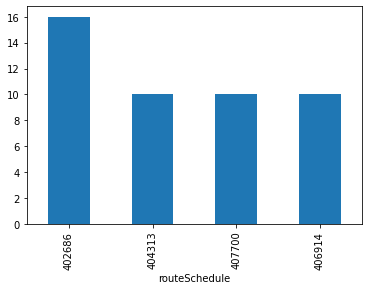

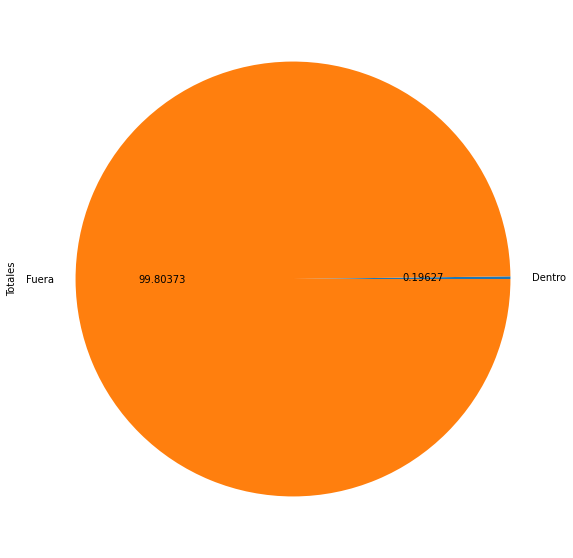

Ingrese la opcion a analizar:
        4-.Acompañamientos
        35.-Visita  a cliente
        0 - Salir
 0


In [53]:
#**********************************************************************************************
#****************************Logica del programa principal*************************************
#**********************************************************************************************
Salir=""

while(Salir!=0):
    
    #creamos una nueva instancia de la clase para iniciar el analisis
    ModeloV = ModeloVisita()
    
    #seleccionamos las opciones a analizar
    optionSelected, mesSelected, regla = cargarMenu()
    
    if optionSelected == 0:
        Salir=0
        break
    
    elif optionSelected != 4 and optionSelected != 35:
        print("Opcion incorrecta, por favor verifique!")
    
    else:
        #Iniciamos flujo de analisis normal
    
        #Seleccionamos el tipo de analisis
        ModeloV.tipoAnalisis = subMenu()

        #Completamos el resto de parametros de la clase
        ModeloV.mes = mesSelected
        ModeloV.reglaNegocio = regla
        ModeloV.tipoVisita = optionSelected
        
        print("tipoAnalisis",ModeloV.tipoAnalisis )
        print("mes",ModeloV.mes )
        print("reglaNegocio",ModeloV.reglaNegocio )
        print("tipoVisita",ModeloV.tipoVisita )
        print("key",ModeloV.key )

        #Cargamos el archivo con los datos
        datos = ModeloV.cargarArchivo()

        if ModeloV.tipoAnalisis < 3 : #Analisis de visita por ruta/cliente (tipoAnalisis 1 y 2)
            if ModeloV.tipoVisita == 4:
                ModeloV.key = "routeSchedule"
            else:
                ModeloV.key = "customer"
        else:
            ModeloV.key = "employee"
            
        datosEspecificos = datos[[ModeloV.key, "idSchedul",]]

        datosFinales = datosEspecificos.groupby([ModeloV.key],as_index=True).count().sort_values(by='idSchedul',ascending=False)
            
        #Analisis final
        ModeloV.analizar(datosFinales)
